###  Introduction

In this lab, we analyzed avocado sales data to uncover trends and insights about Hass avocado prices and sales volumes across various US regions from 2015 to 2020. This dataset includes attributes such as total volume, different bag sizes, types of avocados, and geographical sales data which can all be leveraged to produce some interesting findings and visualizations. Our goal is to understand the factors influencing avocado prices and sales, providing valuable information for both business decisions and also influence consumer awareness, especially for Avocado lovers. This analysis was guided by specific questions provided to direct our exploration and findings, as this was one my first Jupyter notebooks among the various others hosted on GitHub, marking an important step in my journey of data analysis, machine learning, and professionally presenting results.

#### 0: Import Data and Declare Packages

In [100]:
import pandas as pd
import numpy as np

avocado = pd.read_csv("/Users/rileysvensson/Desktop/GSB_544/Labs/Lab_2/Lab_2_Data/avocado-updated-2020.csv")

avocado = pd.DataFrame(avocado)

Resources:

- [unstack function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html)
- [create copy of df for editing](https://www.programiz.com/python-programming/methods/list/copy)
- [splitting a string](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)
- [aggregate function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)
- [using hjust to adjust horizontal axis labels](https://stackoverflow.com/questions/7263849/what-do-hjust-and-vjust-do-when-making-a-plot-using-ggplot)
- [transform column to categorical & order with categorical( )](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html)
- [transform function to find mean following groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html)


#### 1. Briefly describe the data set. What information does it contain?

The data set contains information about **avocado pricing** published in the year 2020, which contains various other attributes about the sale of **Hass** avocados from 2015 to 2020, such as `total volume`, `bag sizes`, `types of avocado`, and where they were grown. The data was collected using retail scans, which means that it came directly from a retailer’s cash register as they scanned and sold these Hass avocados. The data is also explained to contain multiple-outlets, meaning that it includes several channels of avocado sales, such as `grocery`, `mass club`, and `others`. The column, average price, describes the price per unit sold, accounting for the avocados sold in bags as well. The columns 4046, 4225, and 4770, are classified as the product lookup codes also known as PLU’s, and define the size of the Hass avocados. In terms of observations, the set includes 33,045 different observations of avocado information entries, with the 13 different variables that have been discussed.


#### 2. Clean the data in any way you see fit.

In [101]:
# View all unique geography regions
regions = avocado['geography'].unique()

# Filter rows where geography is not 'Total U.S.'
avocado_clean = avocado[avocado['geography'] != 'Total U.S.'].copy()

# Create a new column 'major_metro' using isin()
major_regions = ['Great Lakes', 'Midsouth', 'Northeast', 'Plains', 'Southeast', 'South Central', 'West']

# Sets default for major_metro as Metro for all, then changes variable to Major if in the list above
avocado_clean.loc[:,'major_metro'] = 'Metro'  
avocado_clean.loc[avocado_clean['geography'].isin(major_regions), 'major_metro'] = 'Major'

# Rename size columns from 4040,4225,4770 to Small,Large,Xlarge
avocado_clean = avocado_clean.rename(columns={'4046': 'Small_plu', '4225': 'Large_Plu', '4770': 'Xlarge_Plu'})

# Filter rows for 'major' and 'metro' into their own dataframes for ease of use later
major = avocado_clean[avocado_clean['major_metro'] == 'Major']
metro = avocado_clean[avocado_clean['major_metro'] == 'Metro']


#### 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?


In [102]:
# Filter to have only Organic type in 2017 avocados
major_clean = major[(major['year'] == 2017) & (major["type"] == 'organic')]

# Group by regions (geography) and aggregate the sum of 'Small_plu'

sum_Small_regions = major_clean.groupby('geography').agg(Total_Small =('Small_plu', 'sum'))

# Sort the data in descending order based on new'Total_Small' variable
sum_Small_regions_sort = sum_Small_regions.sort_values(by='Total_Small', ascending=False)

# Return the highest region with total organic, small avocados in 2017
sum_Small_regions_sort.head(1)

,Total_Small
geography,
West,1870206.29


The Western major geographical region sold the most small Hass avocados in 2017 of 1,870,206.29

#### 4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [103]:
# Separate the 'date' column in format YYYY-MM-DD
avocado_clean[['Year', 'Month', 'Day']] = avocado_clean['date'].str.split('-', expand=True)

# Subset to include Month and Total Volume columns 
totalvolume_months = avocado_clean[['Month', 'total_volume']]

# Group by 'Month' and calculate the average of total_volume of avocado sales
totalvolume_by_months = totalvolume_months.groupby('Month').agg(Average_Volume =('total_volume', 'mean'))

# Sort the new Average_Volume variable in descending order
avg_volume_months_sort = totalvolume_by_months.sort_values(by='Average_Volume', ascending=False)

# Return the Month with the highest Average Volume
avg_volume_months_sort.head(1)


,Average_Volume
Month,
05,712152.964249


May (5) had the highest average total volume of avocado sales of 712,152.96

#### 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

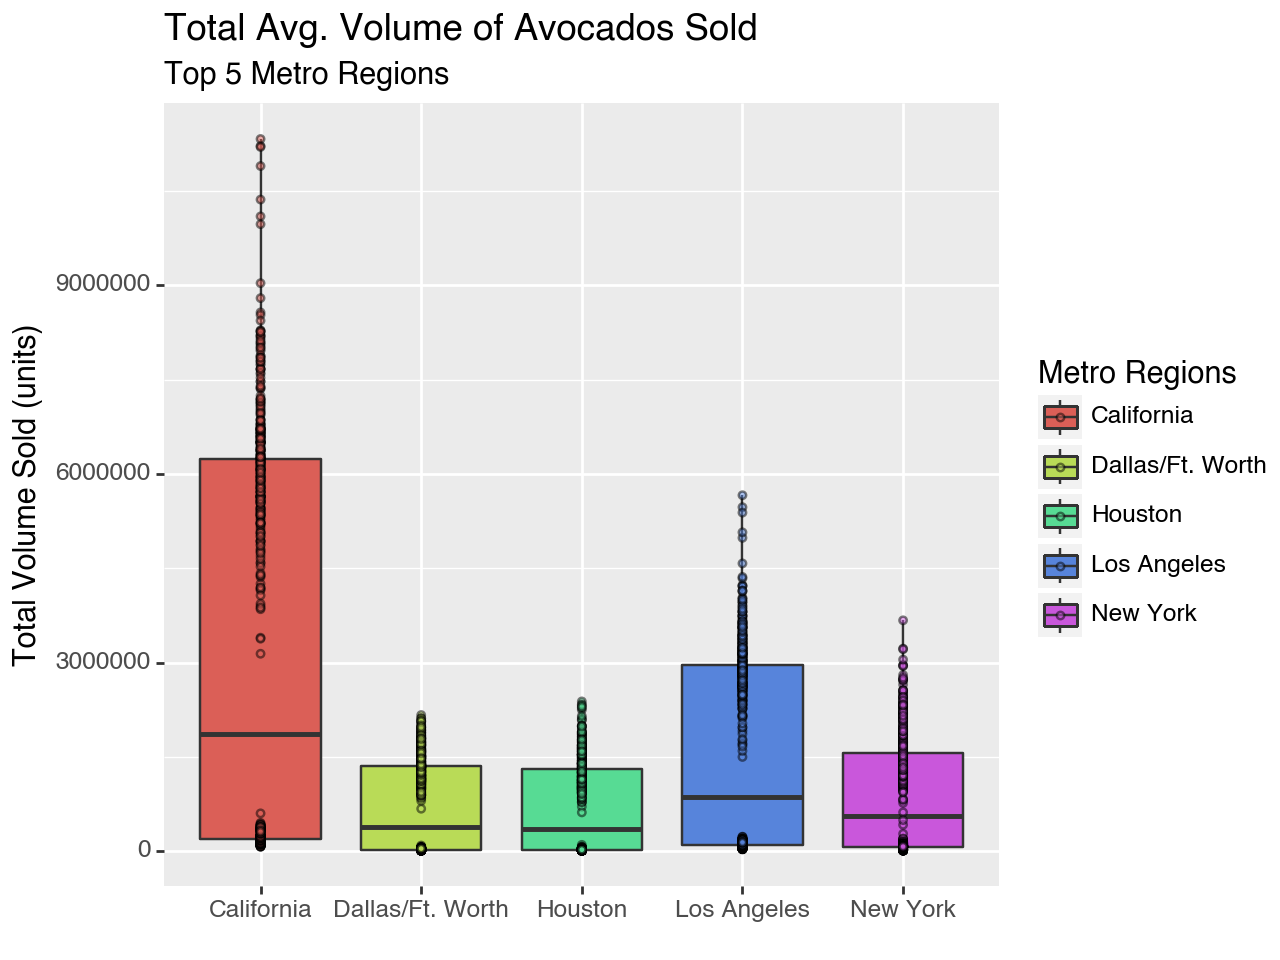

<Figure Size: (640 x 480)>

In [104]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_point, labs, ggtitle

# Groupby 'geography' and calculate average volume using agg function
grouped_metro = metro.groupby('geography').agg(Average_Volume =('total_volume', 'mean'))

# Sort grouped_metro in descending order by Average_Volume 
sorted_grouped_metro = grouped_metro.sort_values(by='Average_Volume', ascending=False)

# Display the first five rows of sorted grouped by Metro's, to create list of top 5
sorted_grouped_metro.head()

# Create list of top 5 returned metro areas from head()
top5_metro = ['California', 'Los Angeles', 'New York', 'Dallas/Ft. Worth', 'Houston']


# Filter the metro dataframe we created in part 2 to include only top 5 Metro's
metro_top5 = metro[metro['geography'].isin(top5_metro)]


# Plot side-by-side boxplots using filtered metro df of only 5 top regions, geom_point ensures indv. points are graphed
(ggplot(metro_top5, aes(x='geography', y='total_volume', fill='geography'))
    + geom_boxplot()  
    + geom_point(aes(y='total_volume'), alpha=0.5, size=1)
    + labs(x='', y='Total Volume Sold (units)', fill='Metro Regions', subtitle='Top 5 Metro Regions')
    + ggtitle('Total Avg. Volume of Avocados Sold')
)


#### 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [105]:
# Filter the avocado_clean df to include only the California 'geography' regions
california = avocado_clean[avocado_clean['geography'].isin(['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco'])]

#### 7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [106]:
# Groupby geography and type and compute average price, using unstack to reshape our data to be able to subtract easily
avg_prices = california.groupby(['geography', 'type'])['average_price'].mean().unstack()

# Calculate the price difference and assign it to a new variable in the avg_prices df 
avg_prices['price_difference'] = avg_prices['organic'] - avg_prices['conventional']

# Display new df of differences and avg prices by type, geography
(avg_prices)


type,conventional,organic,price_difference
geography,,,
Los Angeles,1.047124,1.574902,0.527778
Sacramento,1.295359,1.873856,0.578497
San Diego,1.113856,1.798366,0.684510
San Francisco,1.400490,2.119444,0.718954


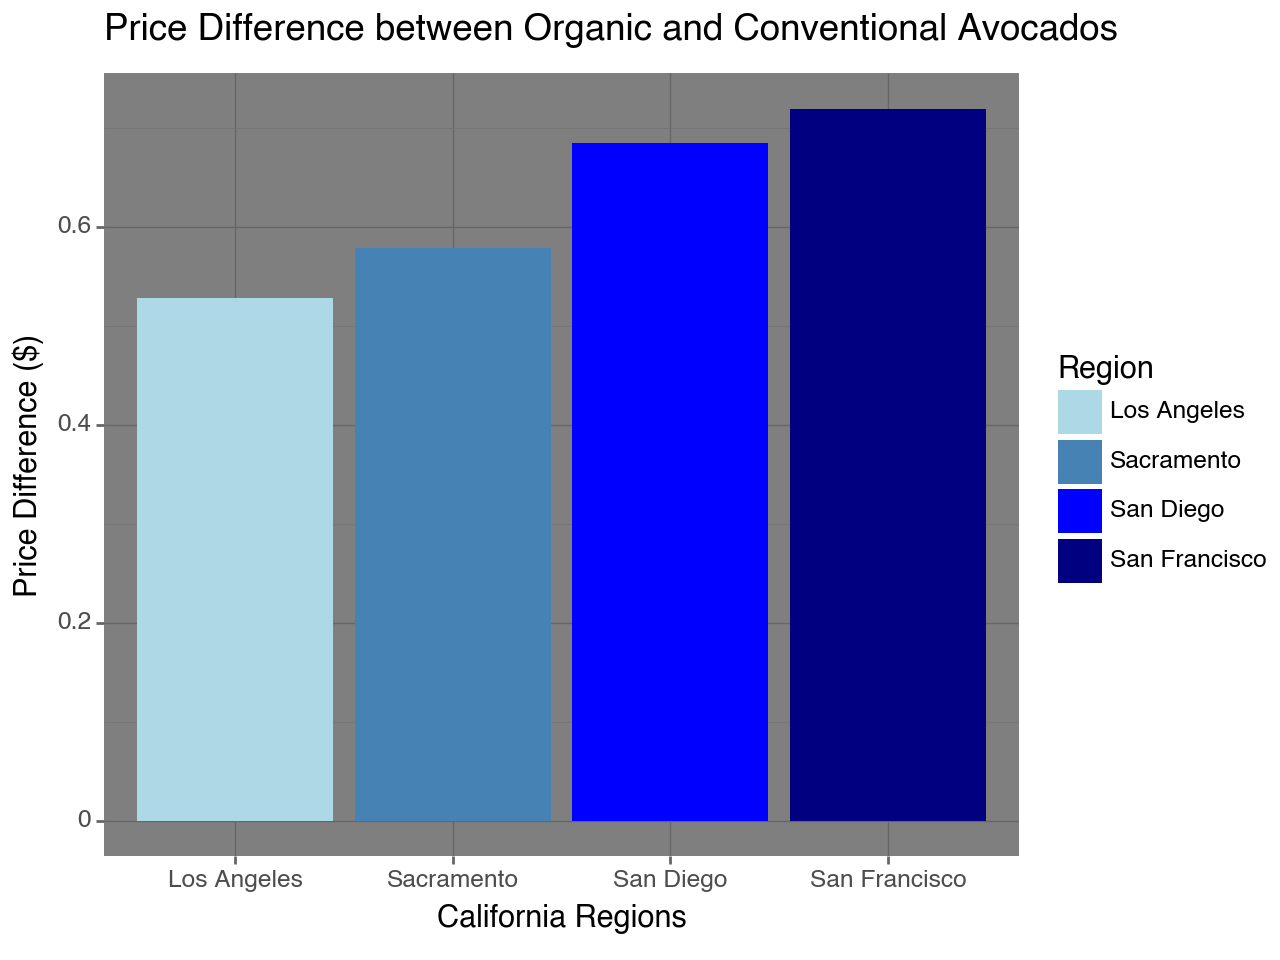

<Figure Size: (640 x 480)>

In [107]:
# Reset the index to convert 'geography' from an index to a column, so we can directly refer to 'geography' when plotting
avg_prices = avg_prices.reset_index()

# Using our df of avg_prices, plot the price_diff on the y, and geography on the x, making a barchart a great option

from plotnine import geom_bar, scale_fill_manual, theme_dark

(ggplot(avg_prices, aes(x='geography', y='price_difference', fill='geography'))
    + geom_bar(stat='identity')
    + labs(x='California Regions', y='Price Difference ($)', fill='Region')
    + ggtitle('Price Difference between Organic and Conventional Avocados')
    + scale_fill_manual(values = ['lightblue','steelblue','blue','navy'])
    + theme_dark()
)


#### 8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

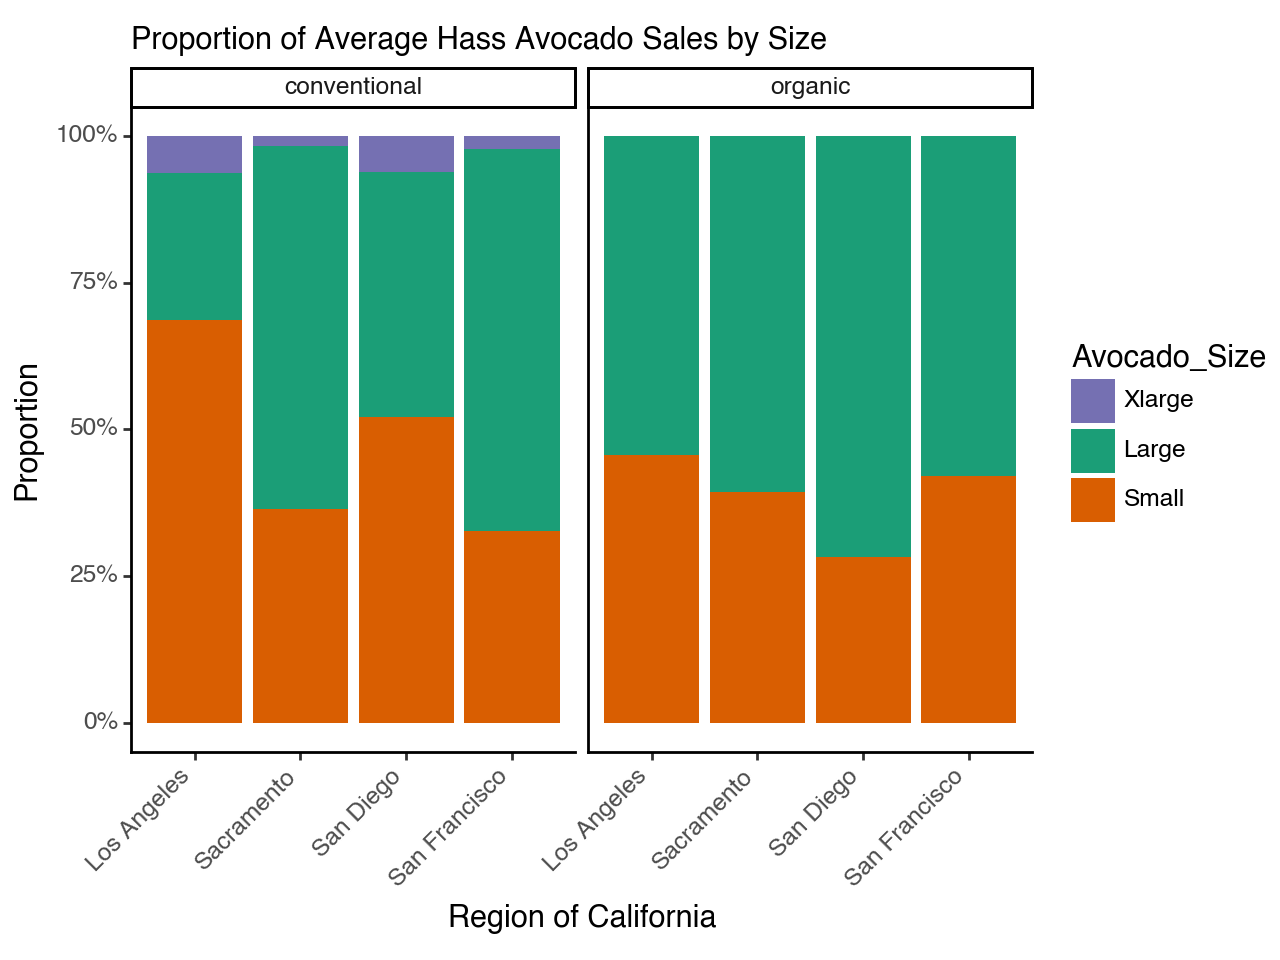

<Figure Size: (640 x 480)>

In [108]:
from plotnine import ggplot, aes, geom_col, facet_wrap, scale_y_continuous, scale_fill_manual, labs, theme_classic, theme, element_text

# Make a copy of the california dataframe for editing
california_copy = california.copy()

# Find the total of avocados sold, and divide each size category by the total sold to get the proportion sold 
california_copy['total_sold'] = california_copy['Small_plu'] + california_copy['Large_Plu'] + california_copy['Xlarge_Plu']
california_copy['Small'] = california_copy['Small_plu'] / california_copy['total_sold']
california_copy['Large'] = california_copy['Large_Plu'] / california_copy['total_sold']
california_copy['Xlarge'] = california_copy['Xlarge_Plu'] / california_copy['total_sold']

# Reshape the california copy df, to be in long-form rather than wide, that shows the proportion of type by size
melted_california = california_copy.melt(id_vars=['geography', 'type'], 
                                         value_vars=['Small', 'Large', 'Xlarge'],  
                                         var_name='Avocado_Size', 
                                         value_name='Proportion')

# Set the order for Avocado_Size to match graph when plotted (Otherwise would be Small on top in bars + legend)
order = ['Xlarge', 'Large', 'Small']
melted_california['Avocado_Size'] = pd.Categorical(melted_california['Avocado_Size'], categories=order, ordered=True)


(ggplot(melted_california, aes(y='Proportion', x='geography', fill='Avocado_Size'))
    + geom_col(position='fill')
    + facet_wrap('~type')
    + scale_y_continuous(breaks=[0, 0.25, 0.5, 0.75, 1], labels=['0%', '25%', '50%', '75%', '100%']) 
    + scale_fill_manual(values=['#7570b2', '#1b9e77', '#d95e01'])
    + labs(y='Proportion', x = 'Region of California', subtitle='Proportion of Average Hass Avocado Sales by Size')
    + theme_classic()
    + theme(axis_text_x=element_text(angle=45, hjust=1))
)



### Using Outside Data
A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

**Zillow Datasources:**

- [SF House Price Average](https://www.zillow.com/home-values/20330/san-francisco-ca/)
- [SD House Price Average](https://www.zillow.com/home-values/54296/san-diego-ca/)
- [LA House Price Average](https://www.zillow.com/home-values/12447/los-angeles-ca/)
- [SAC House Price Average](https://www.zillow.com/home-values/20288/sacramento-ca/)


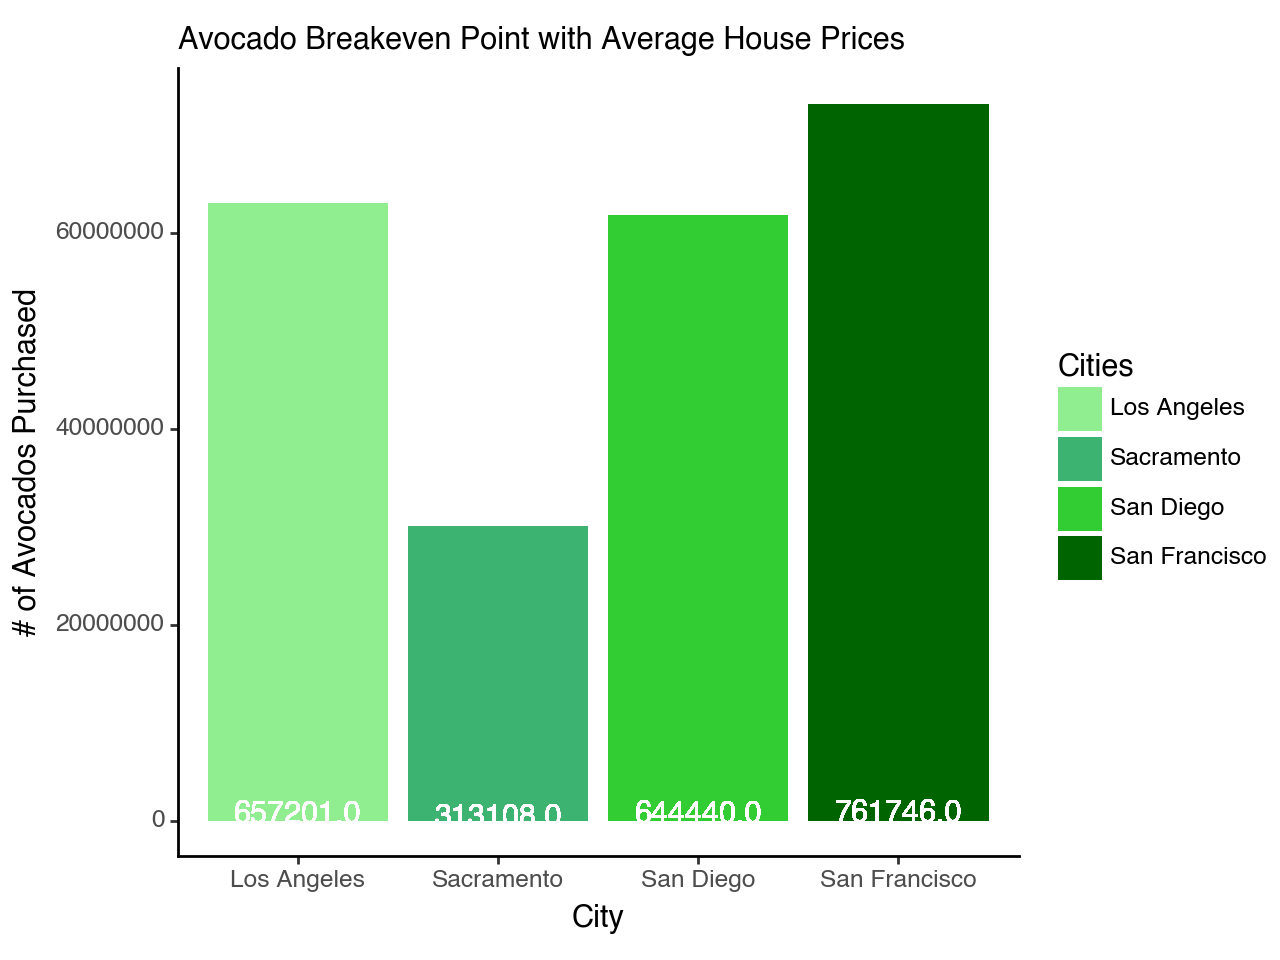

<Figure Size: (640 x 480)>

In [110]:
import pandas as pd
from plotnine import *

# Create a new dataframe using mean housing prices from Zillow for each city
zillow_avg_prices_2023 = [1271322,916727,950012,471129]
locations = ['San Francisco','Los Angeles','San Diego','Sacramento']
housing_prices = pd.DataFrame({'locations': locations, 'zillow_avg_prices_2023': zillow_avg_prices_2023})

# Join with California_copy set on location (geography)
housing_avocado_prices = pd.merge(california_copy, housing_prices, left_on='geography', right_on='locations')

# Filter for 2020 only as this is most recent avocado prices
housing_avocado_prices = housing_avocado_prices[housing_avocado_prices['year'] == 2020]

# Create a new variable that finds the average of the average avocado price in each region in 2020, regardless of type
housing_avocado_prices['avg_price_avo_2020'] = housing_avocado_prices.groupby('geography')['average_price'].transform('mean')

# Calculate avocado breakeven point, (avg house prices / avg avocado prices)
housing_avocado_prices['avocado_equivalent'] = housing_avocado_prices['zillow_avg_prices_2023'] / housing_avocado_prices['avg_price_avo_2020']

# Plot the value of avocado_equivalent which displays how many avocados would need to be purchased to reach avg. house price in that area 
(ggplot(housing_avocado_prices, aes(x='geography', y='avocado_equivalent', fill='geography'))
        + geom_col()
        + geom_text(aes(label='round(avocado_equivalent)'), color="white")
        + labs(x='City', y='# of Avocados Purchased', subtitle='Avocado Breakeven Point with Average House Prices', fill='Cities')
        + scale_fill_manual(values=['lightgreen','mediumseagreen','limegreen','darkgreen'])
        + theme_classic()
)


In [111]:
print(housing_avocado_prices[['geography', 'avg_price_avo_2020']].drop_duplicates())

          geography  avg_price_avo_2020
516     Los Angeles            1.394896
1128     Sacramento            1.504687
1740      San Diego            1.474167
2352  San Francisco            1.668958


**Findings:**

When comparing the average avocado prices in 2020, throughout the four cities: San Diego, San Francisco, Los Angeles, and Sacramento, with each location’s average house price in 2020, this is the result. In terms of average avocado prices in the most recent year of the data set, 2020, Los Angeles had the cheapest average of 1.394896 dollars per avocado, San Diego had the 2nd cheapest at 1.474167 dollars, followed by Sacramento at 1.505 dollars, and finally San Francisco with the most expensive average of 1.668958 dollars per avocado. **When you take the average housing price in 2023 of each city, and divide it by the average avocado price of 2020 (likely similar to 2023 prices), this produces the number of avocados that a person would need to purchase, to be equivalent to the city’s average house price.** 

The least amount of avocados purchased to spend as much as the average house price in 2023 is Sacramento with only 313,108 avocados. Next highest is San Diego with 644,440 avocados needing to be purchased to breakeven with it’s average housing price. Third, is Los Angeles, which makes some sense as they have the cheapest avg. avocado price, allowing them to buy more before reaching their house average after 657,201 avocados purchased. Lastly, the most expensive avocado price average is in the same area where the most have to be purchased, to break-even with San Francisco’s house price average.  A buyer would have to purchase 761,746 avocados, which is double Sacramento's equivalent and higher than the other locations. **With all this information, it would make sense for an avocado toast lover to reside in San Francisco, as they could purchase the most avocados without spending equivalent to SF’s average home. Essentially, they have the highest purchasing power for avocados in San Francisco in comparison to LA, SD, and SAC.**  

**However a more reasonable option of residence would be Los Angeles or San Diego, as they both have a significantly cheaper housing price averages than SF, while maitaining the 1st & 2nd cheapest avocados, making it most appealing to avocado toast enthusiasts.**